In [1]:
!pip install chardet
!pip install matplotlib
!pip install seaborn
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import seaborn as sns


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
file_path = "pmn96cur.txt"

# Detect the encoding of the file using chardet
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())
file_encoding = result['encoding']

# Read the .txt file into a pandas DataFrame with the detected encoding
df = pd.read_csv(file_path, sep='|', encoding=file_encoding)

# Display the DataFrame
print(df)
#df.to_excel('output.xlsx', index=False)

         KNUMBER                       APPLICANT           CONTACT   
0      DEN000001                  OHMEDA MEDICAL  DANIEL  KOSEDNAR  \
1        K000001  BOSTON SCIENTIFIC SCIMED, INC.      RON  BENNETT   
2      DEN000002                  UROSURGE, INC.   STEVEN J PREISS   
3        K000002           USA INSTRUMENTS, INC.      RONY  THOMAS   
4        K000003                         TORNIER   DAVID W SCHLERF   
...          ...                             ...               ...   
90479    K994435           JENERIC/PENTRON, INC.  ANNMARIE  TENERO   
90480    K994436              SURGI-VISION, INC.    NANCY E TAYLOR   
90481    K994437                  CYNOSURE, INC.       GEORGE  CHO   
90482    K994438                   SPECTRX, INC.     JAMES R VEALE   
90483    K994439           BECKMAN COULTER, INC.    MICHELE S GUST   

                              STREET1       STREET2             CITY STATE   
0                       P.O. BOX 7550           NaN          MADISON    WI  \
1  

In [3]:
#calculate duration

df['DATERECEIVED'] = pd.to_datetime(df['DATERECEIVED'])
df['DECISIONDATE'] = pd.to_datetime(df['DECISIONDATE'])


df['Duration'] = df['DECISIONDATE'] - df['DATERECEIVED']
df_duration = df.copy()

df_duration['DATERECEIVED'] = pd.to_datetime(df['DATERECEIVED'])
df_duration = df_duration[df_duration['DECISIONDATE'] > '2017-12-31']


print(df_duration)
#df_duration.to_excel('output.xlsx', index=False)

         KNUMBER                                   APPLICANT          CONTACT   
23721  DEN070001  CENTERS FOR DISEASE CONTROL AND PREVENTION     HYE-JOO  KIM  \
49918    K151721               KDB INC. (DBA) SPERTI SUNLAMP   JAMES  SHEPERD   
51558  DEN160006                           TVA Medical, Inc.    Noah  Bartsch   
51583  DEN160029                        BELLUS MEDICAL, LLC.  JENNIFER  BLOCK   
51594  DEN160044                    Edwards Lifesciences LLC     Lisa  Gilman   
...          ...                                         ...              ...   
73384    K231925                        LimaCorporate S.p.A.  Kenneth  Newman   
73385    K231931             Shanghai Sanyou Medical Co, LTD       David  Fan   
73386    K231945                         AngioDynamics, Inc.     Laura  Dwyer   
73387    K231951                                 Alevio, LLC    Trey  Robbins   
73388    K232011                       American Orthodontics  Laura  Richmond   

                       STRE

In [5]:
#select all dental
df_dental = df_duration[df_duration['CLASSADVISECOMM'] == 'DE']
#print(df_dental)
#select all dental traditional
df_tra_dental = df_dental[df_dental['TYPE'] == 'Traditional']
#print(df_tra_dental)
#select dental-dze,nha,pnp
df_dzenhapnp = df_tra_dental[df_tra_dental['PRODUCTCODE'].isin(['DZE', 'NHA', 'PNP'])]
#print(df_dzenhapnp)
#Straumann
df_stm = df_dzenhapnp[df_dzenhapnp['APPLICANT'].str.contains('Straumann', case=False)]
#print(df_stm)
#Competitors
df_comp = df_dzenhapnp[~df_dzenhapnp['APPLICANT'].str.contains('Straumann', case=False)]
#print(df_comp)

C:\Users\u125935\AppData\Local\Temp\ipykernel_1484\788513199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tra_dental['DECISIONDATE'] = pd.to_datetime(df_tra_dental['DECISIONDATE'])
C:\Users\u125935\AppData\Local\Temp\ipykernel_1484\788513199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dzenhapnp['DECISIONDATE']= pd.to_datetime(df_dzenhapnp['DECISIONDATE'])
C:\Users\u125935\AppData\Local\Temp\ipykernel_1484\788513199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

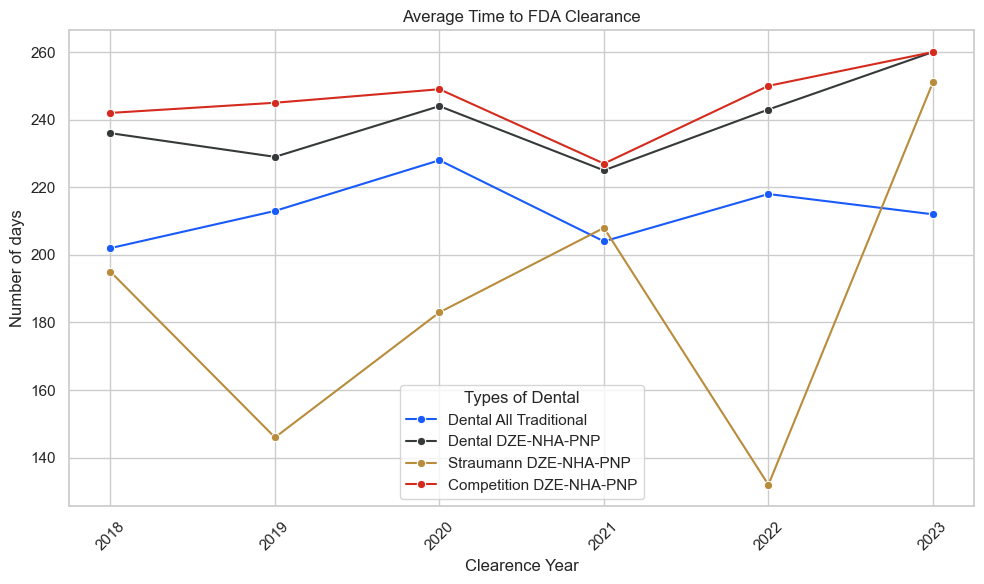

In [8]:
#Line plot
df_tra_dental['DECISIONDATE'] = pd.to_datetime(df_tra_dental['DECISIONDATE'])
df_dzenhapnp['DECISIONDATE']= pd.to_datetime(df_dzenhapnp['DECISIONDATE'])
df_stm['DECISIONDATE'] = pd.to_datetime(df_stm['DECISIONDATE'])
df_comp['DECISIONDATE'] = pd.to_datetime(df_comp['DECISIONDATE'])

# Extract years
df_tra_dental['Year'] = df_tra_dental['DECISIONDATE'].dt.year
df_dzenhapnp['Year'] = df_dzenhapnp['DECISIONDATE'].dt.year
df_stm['Year'] = df_stm['DECISIONDATE'].dt.year
df_comp['Year'] = df_comp['DECISIONDATE'].dt.year


# Calculate the average duration for each year
Dental_All = df_tra_dental.groupby('Year')['Duration'].mean()
Dental_DZE_NHA_PNP = df_dzenhapnp.groupby('Year')['Duration'].mean()
Straumann_DZE_NHA_PNP = df_stm.groupby('Year')['Duration'].mean()
Competition_DZE_NHA_PNP = df_comp.groupby('Year')['Duration'].mean()

#Convert durations to days for y-axis formatting
Dental_All= Dental_All.dt.days
Dental_DZE_NHA_PNP = Dental_DZE_NHA_PNP.dt.days
Straumann_DZE_NHA_PNP = Straumann_DZE_NHA_PNP.dt.days
Competition_DZE_NHA_PNP = Competition_DZE_NHA_PNP.dt.days

# Dental_All['Duration'] = Dental_All['Duration'].dt.days
# Dental_DZE_NHA_PNP['Duration'] = Dental_DZE_NHA_PNP['Duration'].dt.days
# Straumann_DZE_NHA_PNP['Duration'] = Straumann_DZE_NHA_PNP['Duration'].dt.days
# Competition_DZE_NHA_PNP['Duration'] = Competition_DZE_NHA_PNP['Duration'].dt.days

#seaborn style
sns.set(style="whitegrid")

# Create line charts
plt.figure(figsize=(10, 6))

sns.lineplot(data=Dental_All, marker="o", label='Dental All Traditional', color = '#195AFA')
sns.lineplot(data=Dental_DZE_NHA_PNP, marker="o", label='Dental DZE-NHA-PNP', color = '#36393A')
sns.lineplot(data=Straumann_DZE_NHA_PNP, marker="o", label='Straumann DZE-NHA-PNP', color = '#B98C3C')
sns.lineplot(data=Competition_DZE_NHA_PNP, marker="o", label='Competition DZE-NHA-PNP', color = '#D52B1E')


# Format y-axis ticks to display values as integers (e.g., 120 instead of 1.2)
def format_y_ticks(value, _):
    return f"{int(value)}"
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_ticks))


plt.xlabel("Clearence Year")
plt.ylabel("Number of days")
plt.title("Average Time to FDA Clearance")

# Show the legend
plt.legend(title='Types of Dental')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a JPG image
plt.savefig('Avg FDA Clearenec line chart.jpg', dpi=300)
plt.show()


C:\Users\u125935\AppData\Local\Temp\ipykernel_1484\3112757174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tra_dental['DECISIONDATE'] = pd.to_datetime(df_tra_dental['DECISIONDATE'])
C:\Users\u125935\AppData\Local\Temp\ipykernel_1484\3112757174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dzenhapnp['DECISIONDATE']= pd.to_datetime(df_dzenhapnp['DECISIONDATE'])
C:\Users\u125935\AppData\Local\Temp\ipykernel_1484\3112757174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy 

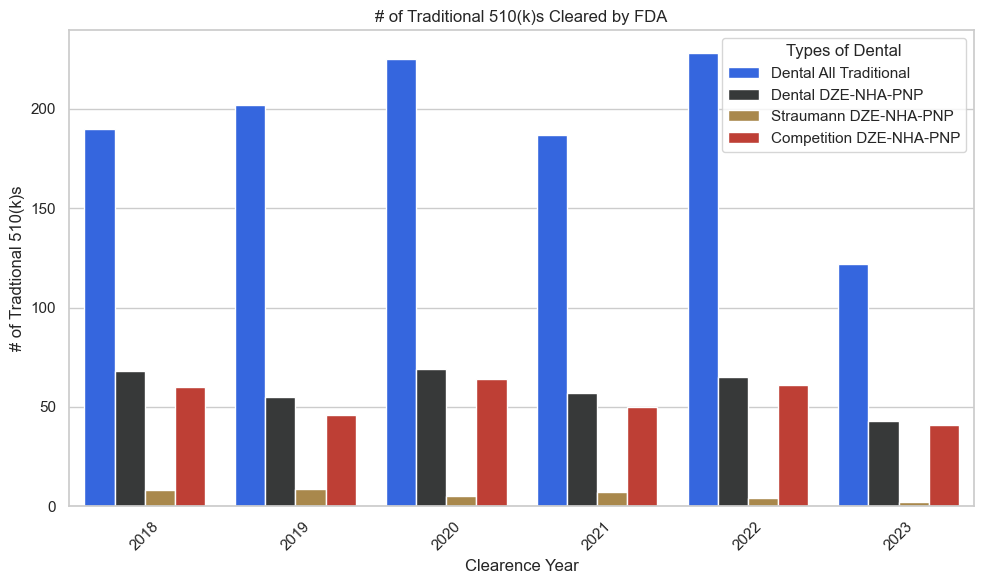

In [9]:
#Barplot
df_tra_dental['DECISIONDATE'] = pd.to_datetime(df_tra_dental['DECISIONDATE'])
df_dzenhapnp['DECISIONDATE']= pd.to_datetime(df_dzenhapnp['DECISIONDATE'])
df_stm['DECISIONDATE'] = pd.to_datetime(df_stm['DECISIONDATE'])
df_comp['DECISIONDATE'] = pd.to_datetime(df_comp['DECISIONDATE'])

# Extract years
df_tra_dental['Year'] = df_tra_dental['DECISIONDATE'].dt.year
df_dzenhapnp['Year'] = df_dzenhapnp['DECISIONDATE'].dt.year
df_stm['Year'] = df_stm['DECISIONDATE'].dt.year
df_comp['Year'] = df_comp['DECISIONDATE'].dt.year

# Calculate the average duration for each year
count_dental = df_tra_dental.groupby('Year').size().reset_index(name='Count')
count_dental_dnp = df_dzenhapnp.groupby('Year').size().reset_index(name='Count')
count_straumann = df_stm.groupby('Year').size().reset_index(name='Count')
count_comp = df_comp.groupby('Year').size().reset_index(name='Count')


# # Add a new column indicating the DataFrame source
count_dental['DataFrame'] = 'Dental All Traditional'
count_dental_dnp['DataFrame'] = 'Dental DZE-NHA-PNP'
count_straumann ['DataFrame'] = 'Straumann DZE-NHA-PNP'
count_comp['DataFrame'] = 'Competition DZE-NHA-PNP'


combined_counts = pd.concat([count_dental, count_dental_dnp, count_straumann, count_comp], ignore_index=True)


# Set the style for Seaborn
sns.set(style="whitegrid")

# Create the bar chart using Seaborn
plt.figure(figsize=(10, 6))

#Change colors
custom_colors = ["#195AFA", "#36393A", "#B98C3C", "#D52B1E"]

# Plot the bar chart with hue for each DataFrame
sns.barplot(data=combined_counts, x='Year', y='Count', hue='DataFrame', palette=custom_colors)

# Set plot labels and title
plt.xlabel("Clearence Year")
plt.ylabel("# of Tradtional 510(k)s")
plt.title("# of Traditional 510(k)s Cleared by FDA")

# Show the legend
plt.legend(title='Types of Dental')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
#export as jpg
plt.savefig('Trational Bar chart.jpg', dpi=300)
plt.show()
